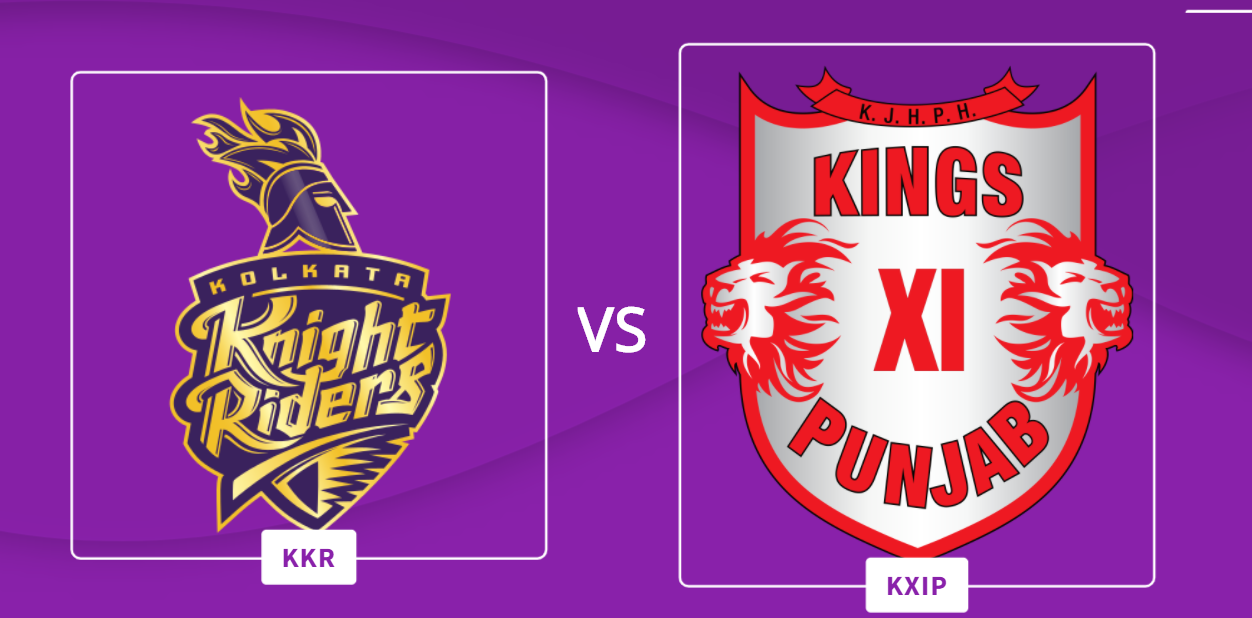

In [1]:
#!pip install bqplot
#!pip install ipywidgets
#!pip install ipympl
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!jupyter nbextension install --user --py widgetsnbextension
#!jupyter nbextension enable --user --py widgetsnbextension
#!pip install plotly
#!pip install cufflinks


import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import bqplot
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip
import cufflinks as cf
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
pd.set_option('display.max_columns', 50)
%matplotlib widget


In [2]:
matches = pd.read_csv("matches.csv")
deliveries =  pd.read_csv("deliveries.csv")
IPL_data = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')

In [4]:
KXIP_bowlers = ['Mohammed Shami', 'A Singh', 'CJ Jordan' , 'M Ashwin', 'GJ Maxwell']
# 'JDS Neesham' not playing
# R bishnoi: New (KXIP bowler) : ER: 7.85

KXIP_batsmen = ['KL Rahul',  'MA Agarwal', 'CH Gayle', 'N Pooran', 'GJ Maxwell', 'DJ Hooda', 'JDS Neesham' ]
# D padikkal new player(RCB batsmen): SR: 126.56, balls faced :192, Runs : 243, matches:7


#KKR batsmen
KKR_batsmen = ['S Gill', 'N Rana', 'RA Tripathi',  'KD Karthik', 'EJG Morgan', 'SP Narine', 'PJ Cummins']
# SP Narine/AD Russell(optional)

#KKR bowlers
KKR_bowlers = ['PJ Cummins',  'P Krishna' , 'LH Ferguson', 'V Chakravarthy', 'SP Narine']
# nagarkoti no data

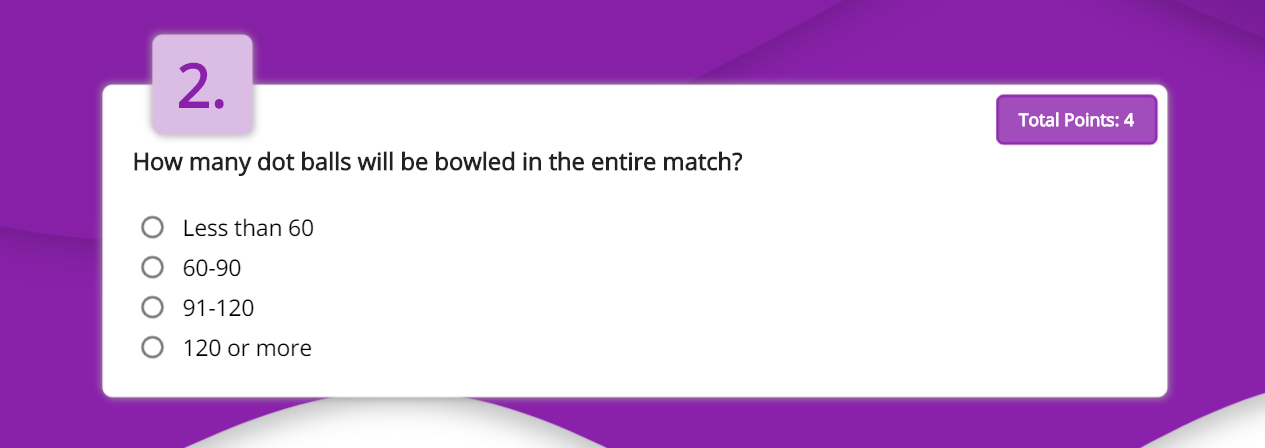

## 2.1
### 1) number of dot balls bowled by KKR and KXIP overall in IPL matches
### 2) number of dot balls bowled by KKR and KXIP overall in IPL matches(matchwise average)
### 3) Dot balls bowled against Each other<br> (KKR bowlers vs KXIP Batsmen and KXIP bowlers vs KXIP batsmen)
### 4) Dot balls bowled against Each other<br> (KKR bowlers vs KXIP Batsmen and KXIP bowlers vs KXIP batsmen) - matchwise average

In [35]:
dotB = deliveries[(deliveries.bowler.isin(KXIP_bowlers)) | (deliveries.bowler.isin(KKR_bowlers))]
dot = dotB[(dotB.batsman_runs == 0) & (dotB.extra_runs == 0)].groupby(['bowler'])['batsman_runs'].count().reset_index(name = "no_of_dotballs")
temp = dotB.groupby(['bowler'])['batsman_runs'].count().reset_index(name = "balls_bowled")
dot["balls_bowled"] =  temp.balls_bowled

#####################################################################################################################
# Match wise average
dot_ = dotB[(dotB.batsman_runs == 0) & (dotB.extra_runs == 0)].groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = "no_of_dotballs")
temp1 = dotB.groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = "balls_bowled")
dot_["balls_bowled"] =  temp1.balls_bowled
for i in dot_.bowler.unique():
    b.append(i)
    b1.append(dot_[dot_.bowler == i].no_of_dotballs.mean())
    b2.append(dot_[dot_.bowler == i].balls_bowled.mean())
dotballs = pd.DataFrame(list(zip(b,b1,b2)), 
               columns =['batsman','no_of_dotballs','balls_bowled'])    
##############################################################################################################################
dot_k = deliveries[((deliveries.bowler.isin(KXIP_bowlers)) & (deliveries.batsman.isin(KKR_batsmen))) |
                 ((deliveries.bowler.isin(KKR_bowlers)) & (deliveries.batsman.isin(KXIP_batsmen)))]

dot_kk = dot_k[(dot_k.batsman_runs == 0) & (dot_k.extra_runs == 0)].groupby(['bowler'])['batsman_runs'].count().reset_index(name = "no_of_dotballs")
temp_k = dot_k.groupby(['bowler'])['batsman_runs'].count().reset_index(name = "balls_bowled")
dot_kk["balls_bowled"] =  temp_k.balls_bowled

#####################################################################################################################
# Match wise average
dot_kk_ = dot_k[(dot_k.batsman_runs == 0) & (dot_k.extra_runs == 0)].groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = "no_of_dotballs")
temp1_k = dot_k.groupby(['match_id','bowler'])['batsman_runs'].count().reset_index(name = "balls_bowled")
dot_kk_["balls_bowled"] =  temp1_k.balls_bowled
b_ = []; b1_= [] ;b2_= []
for i in dot_kk_.bowler.unique():
    b_.append(i)
    b1_.append(dot_kk_[dot_kk_.bowler == i].no_of_dotballs.mean())
    b2_.append(dot_kk_[dot_kk_.bowler == i].balls_bowled.mean())
dotballs1 = pd.DataFrame(list(zip(b_,b1_,b2_)), 
               columns =['batsman','no_of_dotballs','balls_bowled'])    
display_side_by_side([dot, dotballs,dot_kk, dotballs1], 
                     [" 1) Overall dotballs bowled by KKR and KXIP bowlers", " 2) Overall dotballs bowled by KKR and KXIP bowlers (match_id wise average)",
                      "3) Overall dotballs bowled by KKR and KXIP bowlers head to head", "4) Overall dotballs bowled by KKR and KXIP bowlers head to head (match_id wise average)"])


,bowler,no_of_dotballs,balls_bowled
0,A Singh,204,551
1,CJ Jordan,61,213
2,GJ Maxwell,127,432
3,LH Ferguson,40,87
4,M Ashwin,131,432
5,Mohammed Shami,356,1075
6,P Krishna,148,437
7,PJ Cummins,118,379
8,SP Narine,1038,2600
9,V Chakravarthy,8,18


## Data from the second observation seems more reasonable

In [36]:
dotballs.no_of_dotballs.sum()

73.11272872980109

## Conclusion: number of dot balls bowled will be 60 -90

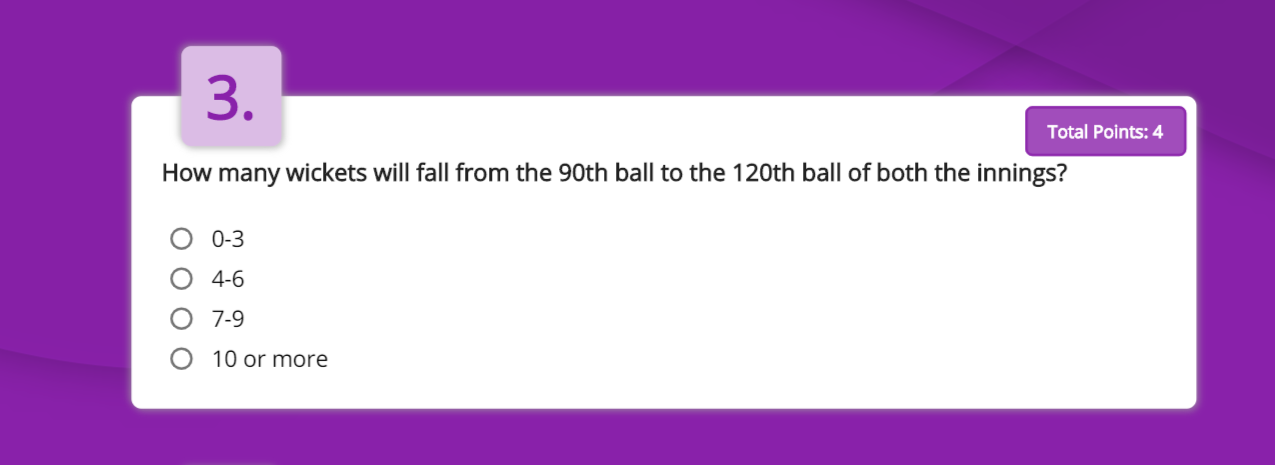

## 3.1 Wickets taken by both the teams bowlers in 90th to 120th ball

In [62]:
#KXIP_bowlers_d = ['Mohammed Shami', 'A Singh', 'CJ Jordan']
#KKR_bowlers_d = ['PJ Cummins', 'P Krishna', 'LH Ferguson']
d_overs = deliveries[((deliveries.bowler.isin(KXIP_bowlers)) | (deliveries.bowler.isin(KKR_bowlers))) &
                    (deliveries.over >= 16)]
d_overs.dismissal_kind.fillna(0, inplace = True)
d_overs.player_dismissed.fillna(0, inplace = True)
d_overs['player_dismissed'].loc[d_overs['player_dismissed'] != 0] = 1
wickets = d_overs[d_overs != 'run out'].groupby(['bowler'])['player_dismissed'].sum().reset_index(name = 'wickets')
print("total_number of wickets taken in deaths by both the teams bowlers: \n\n", wickets)
print("#################################################################################\n\n")

wickets_ = d_overs[d_overs != 'run out'].groupby(['match_id','bowler'])['player_dismissed'].sum().reset_index(name = 'wickets')

w = []
for i in wickets_.bowler.unique():
    print(i)
    #print(wickets_[wickets_.bowler ==i])
    w.append( wickets_[wickets_.bowler ==i].wickets.mean())
    print("Average wickets taken are: ", wickets_[wickets_.bowler ==i].wickets.mean())
    print("#################################################################################")

print("\n\nTotal wickets taken will be :",sum(w))

total_number of wickets taken in deaths by both the teams bowlers: 

            bowler  wickets
0         A Singh       19
1       CJ Jordan        5
2      GJ Maxwell        2
3     LH Ferguson        0
4        M Ashwin        4
5  Mohammed Shami       34
6       P Krishna       13
7      PJ Cummins        9
8       SP Narine       65
#################################################################################


PJ Cummins
Average wickets taken are:  0.6923076923076923
#################################################################################
SP Narine
Average wickets taken are:  0.6989247311827957
#################################################################################
LH Ferguson
Average wickets taken are:  0.0
#################################################################################
GJ Maxwell
Average wickets taken are:  0.5
#################################################################################
Mohammed Shami
Average wickets taken are:  1.0

## 3.2 Head to head : wickets from 90th to 120st ball

In [66]:
head_ = dot_k[dot_k.over >=16]
head_.dismissal_kind.fillna(0, inplace = True)
head_.player_dismissed.fillna(0, inplace = True)
head_['player_dismissed'].loc[head_['player_dismissed'] != 0] = 1
wickets_head_ = head_[d_overs != 'run out'].groupby(['bowler'])['player_dismissed'].sum().reset_index(name = 'wickets')
print("total_number of wickets taken in deaths by both the teams bowlers: \n\n", wickets_head_)
print("#################################################################################\n\n")



total_number of wickets taken in deaths by both the teams bowlers: 

            bowler  wickets
0         A Singh        0
1        M Ashwin        0
2  Mohammed Shami        1
3       SP Narine        3
#################################################################################




## Conclusion: from part 3.1 and 3.2: Wickets taken will be 4-6

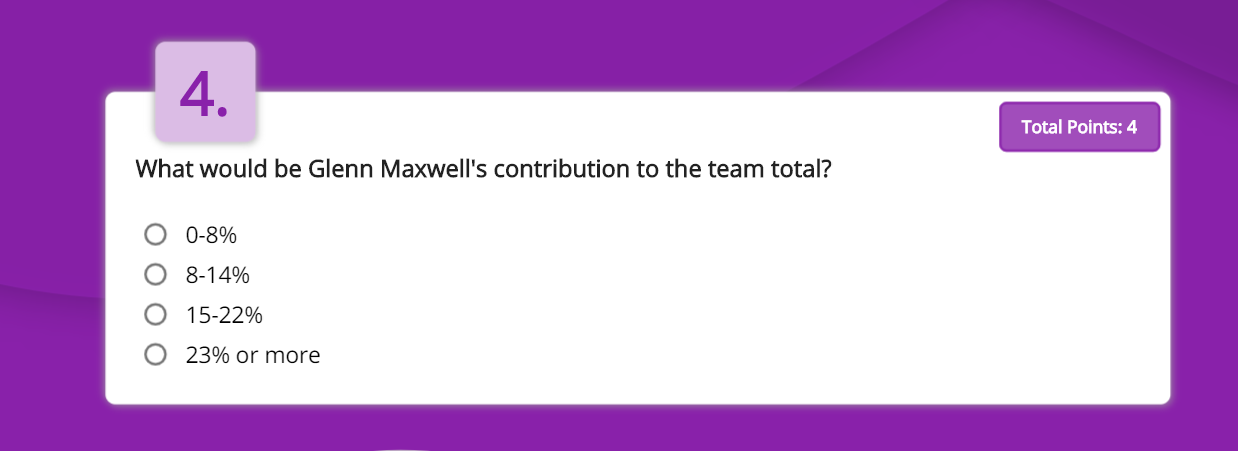

## 4.1 KXIP batsmen performance overall in IPL 

In [74]:
K = deliveries[deliveries.batsman.isin(KXIP_batsmen)]
KXIP = K.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
k_temp = K.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index(name = "runs")
KXIP["runs"] = k_temp.runs
bats = []; r1 = []; r2 = []
for i in KXIP.batsman.unique():
    bats.append(i)
    r1.append(KXIP[KXIP.batsman == i].balls_faced.mean())
    r2.append(KXIP[KXIP.batsman == i].runs.mean())
runs_KXIP = pd.DataFrame(list(zip(bats,r1,r2)), 
               columns =['batsman','balls_faced','runs'])
sh = 'GJ Maxwell'

print("Share of G Maxwell is: ", (runs_KXIP[runs_KXIP.batsman == sh].runs.values[0]/runs_KXIP.runs.sum())*100, "%")

Share of G Maxwell is:  12.65026417353074 %


## 4.2 KXIP batsmen against KKR bowlers

In [75]:
K1 = deliveries[(deliveries.batsman.isin(KXIP_batsmen)) & (deliveries.bowler.isin(KKR_bowlers))]
KXIP1 = K1.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
k_temp1 = K1.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index(name = "runs")
KXIP1["runs"] = k_temp1.runs
bats1 = []; r1_ = []; r2_ = []
for i in KXIP1.batsman.unique():
    bats1.append(i)
    r1_.append(KXIP1[KXIP1.batsman == i].balls_faced.mean())
    r2_.append(KXIP1[KXIP1.batsman == i].runs.mean())
runs_KXIP1 = pd.DataFrame(list(zip(bats1, r1_, r2_)), 
               columns =['batsman','balls_faced','runs'])
sh = 'GJ Maxwell'

print("Share of G Maxwell is: ", (runs_KXIP1[runs_KXIP1.batsman == sh].runs.values[0]/runs_KXIP1.runs.sum())*100, "%")

Share of G Maxwell is:  9.824561403508772 %


## Conclusion :  From ananlysis done in part 4.1 and 4.2 the share of G maxwell's run will be 8-14%

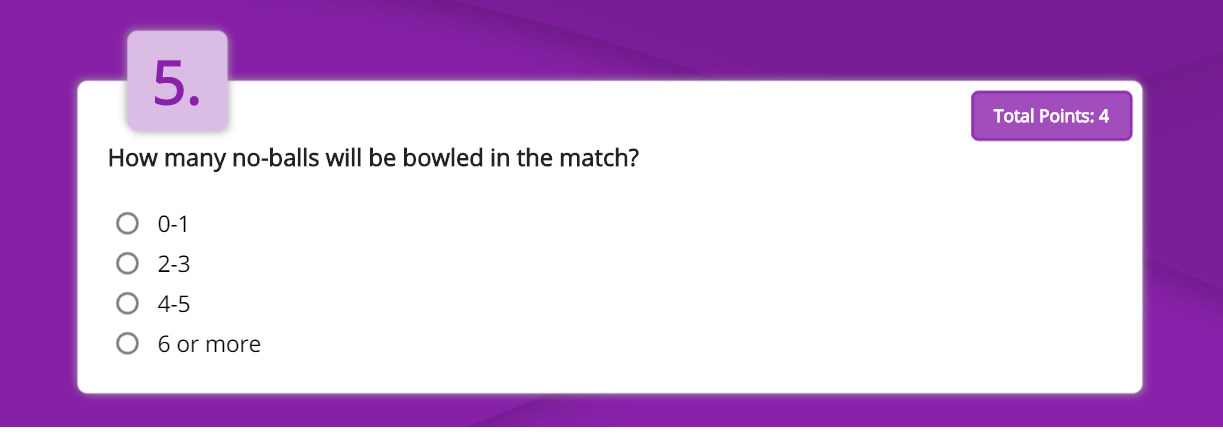

In [82]:
nb = deliveries[(deliveries.bowler.isin(KXIP_bowlers)) | (deliveries.bowler.isin(KKR_bowlers))]
nb1  =  nb.groupby(['match_id', 'bowler'])['noball_runs'].sum().reset_index(name = "no_of_noballs")
nbt = []
for i in nb1.bowler.unique():
    nbt.append(nb1[nb1.bowler == i].no_of_noballs.mean())
    print(i, ":", nb1[nb1.bowler == i].no_of_noballs.mean())

print("\n\nNumber of noballs bowled in match will be: ", sum(nbt))

SP Narine : 0.01834862385321101
PJ Cummins : 0.0625
GJ Maxwell : 0.0
LH Ferguson : 0.0
Mohammed Shami : 0.061224489795918366
CJ Jordan : 0.18181818181818182
A Singh : 0.038461538461538464
M Ashwin : 0.045454545454545456
P Krishna : 0.2222222222222222
V Chakravarthy : 0.0


Number of noballs bowled in match will be:  0.6300296016056173


## Conclusion: Hence, from above nalysis number of no balls bowled in a match will be 0-1

## Wo will win the match?

## Bowling averages of All the bowlers

In [137]:
bowling_avg = deliveries[(deliveries.bowler.isin(KXIP_bowlers)) | (deliveries.bowler.isin(KKR_bowlers))]
bowling_avg.player_dismissed.fillna(0, inplace  = True)
bowling_avg['player_dismissed'].loc[bowling_avg['player_dismissed'] != 0] = 1

b_avg1 = bowling_avg.groupby(['bowler'])['player_dismissed'].sum().reset_index(name  = "wickets")
t_b =  bowling_avg.groupby(['bowler'])['batsman_runs'].count().reset_index(name  = "balls_bowled")
b_avg1["balls_bowled"] = t_b.balls_bowled
b_avg1["bowling_avg"] = b_avg1.wickets/b_avg1.balls_bowled


display_side_by_side([b_avg1[b_avg1.bowler.isin(KXIP_bowlers)], b_avg1[b_avg1.bowler.isin(KKR_bowlers)]], 
                     [" 1) bowling average of KXIP bowlers", " 2) bowling average of KKR bowlers"])


,bowler,wickets,balls_bowled,bowling_avg
0,A Singh,34,551,0.061706
1,CJ Jordan,14,213,0.065728
2,GJ Maxwell,17,432,0.039352
4,M Ashwin,15,432,0.034722
5,Mohammed Shami,52,1075,0.048372
,bowler,wickets,balls_bowled,bowling_avg
3,LH Ferguson,5,87,0.057471
6,P Krishna,16,437,0.036613
7,PJ Cummins,19,379,0.050132
8,SP Narine,137,2600,0.052692


## Batting averages of all the batsmen

In [124]:
batsmen_runs_all =deliveries[(deliveries.batsman.isin(KXIP_batsmen)) | (deliveries.batsman.isin(KKR_batsmen))]
b1_all = batsmen_runs_all.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "total_runs")
b = [];b_avg = [];tm = [];runs  = []
for i in batsmen_runs_all.batsman.unique():
    x = batsmen_runs_all[batsmen_runs_all.batsman == i]
    x.player_dismissed.fillna(0, inplace = True)
    x['player_dismissed'].loc[x['player_dismissed'] != 0] = 1
    #print(x[['match_id','player_dismissed']])
    y = x.groupby(['match_id'])['player_dismissed'].sum().reset_index(name = "out_count")
    z = x.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "runs")
    #print(y)
    b.append(i)
    b_avg.append(y.out_count.sum())
    runs.append(z.runs.sum())
    tm.append(y.shape[0])
    
bat_avg = pd.DataFrame(list(zip(b, b_avg, tm, runs)), 
               columns =['batsman','matches_out','total_matches', 'total_runs'])    

bat_avg["batting_average"] = bat_avg.total_runs/bat_avg.matches_out
bat_avg[bat_avg.batsman.isin(KXIP_batsmen)]
display_side_by_side([bat_avg[bat_avg.batsman.isin(KXIP_batsmen)], bat_avg[bat_avg.batsman.isin(KKR_batsmen)]], [" 1) batting average of KXIP batsmen", " 2) batting average of KKR batsmen"])

,batsman,matches_out,total_matches,total_runs,batting_average
0,DJ Hooda,33,45,535,16.212121
1,CH Gayle,110,124,4560,41.454545
3,MA Agarwal,68,72,1276,18.764706
5,GJ Maxwell,62,67,1403,22.629032
10,KL Rahul,49,58,2013,41.081633
11,JDS Neesham,3,3,42,14.000000
13,N Pooran,6,6,177,29.500000
,batsman,matches_out,total_matches,total_runs,batting_average
2,N Rana,40,41,1104,27.600000
4,KD Karthik,140,162,3688,26.342857


## Performance indexes of batsmen
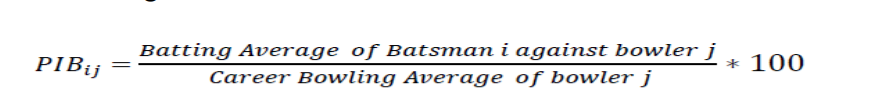

In [156]:
# Performance indexes of KXIP batsmen against KKR bowlers
batsman = [];bowler =[]; b_avg= []; runs= []; tm = []
def performance_indexes_batsmen(batsman_list, bowler_list):
    
    for i in batsman_list:
        pi1 = deliveries[(deliveries.batsman == i) & (deliveries.bowler.isin(bowler_list))]
        pi1.player_dismissed.fillna(0, inplace = True)
        pi1['player_dismissed'].loc[pi1['player_dismissed'] != 0] = 1
        for j in pi1.bowler.unique():
            x = pi1[pi1.bowler == j]
            batsman.append(i)
            bowler.append(j)
            y = x.groupby(['match_id'])['player_dismissed'].sum().reset_index(name = "out_count")
            z = x.groupby(['match_id'])['batsman_runs'].sum().reset_index(name = "runs")
            b_avg.append(y.out_count.sum())
            runs.append(z.runs.sum())
            tm.append(y.shape[0])
            
performance_indexes_batsmen(KXIP_batsmen, KKR_bowlers)
KXIP_bat_avg = pd.DataFrame(list(zip(batsman, bowler, b_avg, tm, runs)), 
               columns =['batsman','bowler', 'matches_out','total_matches', 'total_runs'])      
KXIP_bat_avg["batting_average"] = KXIP_bat_avg.total_runs/KXIP_bat_avg.matches_out
KXIP_bat_avg.replace([np.inf, -np.inf], np.nan, inplace=True)   

bowl_avg = []
for i in KXIP_bat_avg.bowler.values:
    bowl_avg.append(b_avg1[b_avg1.bowler == i].bowling_avg.values[0])
    
KXIP_bat_avg["bowling_average_bowler"] = bowl_avg
KXIP_bat_avg["PIBij"] = KXIP_bat_avg.batting_average/KXIP_bat_avg.bowling_average_bowler # not multiplying with 100 as bowling average is not in %

#############################################################################################################33
# KKR batsmen's performance indexes
batsman = [];bowler =[]; b_avg= []; runs= []; tm = []
performance_indexes_batsmen(KKR_batsmen, KXIP_bowlers)

KKR_bat_avg = pd.DataFrame(list(zip(batsman, bowler, b_avg, tm, runs)), 
               columns =['batsman','bowler', 'matches_out','total_matches', 'total_runs'])      
KKR_bat_avg["batting_average"] = KKR_bat_avg.total_runs/KKR_bat_avg.matches_out
KKR_bat_avg.replace([np.inf, -np.inf], np.nan, inplace=True)   

bowl_avg1 = []
for i in KKR_bat_avg.bowler.values:
    bowl_avg1.append(b_avg1[b_avg1.bowler == i].bowling_avg.values[0])
    
KKR_bat_avg["bowling_average_bowler"] = bowl_avg1
KKR_bat_avg["PIBij"] = KKR_bat_avg.batting_average/KKR_bat_avg.bowling_average_bowler # not multiplying with 100 as bowling average is not in %
display_side_by_side([KXIP_bat_avg, KKR_bat_avg], [" 1) Performance indexes of KXIP batsmen against KKR Bowlers", " 2) Performance indexes of KKR batsmen against KXIP Bowlers"])

,batsman,bowler,matches_out,total_matches,total_runs,batting_average,bowling_average_bowler,PIBij
0,KL Rahul,SP Narine,2,4,70,35.000000,0.052692,664.233577
1,KL Rahul,P Krishna,0,2,14,nan,0.036613,nan
2,MA Agarwal,PJ Cummins,0,1,4,nan,0.050132,nan
3,MA Agarwal,SP Narine,1,4,19,19.000000,0.052692,360.583942
4,MA Agarwal,P Krishna,0,1,19,nan,0.036613,nan
5,CH Gayle,PJ Cummins,0,3,8,nan,0.050132,nan
6,CH Gayle,SP Narine,2,8,48,24.000000,0.052692,455.474453
7,CH Gayle,P Krishna,0,2,13,nan,0.036613,nan
8,N Pooran,SP Narine,0,1,3,nan,0.052692,nan
9,GJ Maxwell,SP Narine,2,10,42,21.000000,0.052692,398.540146


## Performance indexes for both the teams bowlers
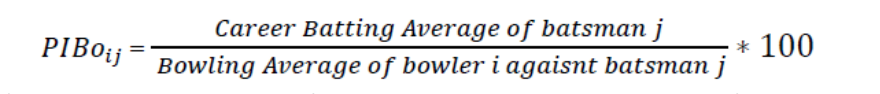

In [182]:
bowls = []; bats = []; wi = []; bb = []
def performance_index_bowlers(bowlers_list, batsmen_list):
    for i in bowlers_list:
        p = deliveries[(deliveries.bowler == i) & (deliveries.batsman.isin(batsmen_list))]
        p.player_dismissed.fillna(0, inplace  = True)
        p['player_dismissed'].loc[p['player_dismissed'] != 0] = 1
        for j in p.batsman.unique():
            bowls.append(i)
            bats.append(j)
            xy = p[p.batsman == j]
            #print(p[p.batsman == j])
            wi.append(xy.player_dismissed.sum())
            bb.append(xy.batsman_runs.count())
        
performance_index_bowlers(KXIP_bowlers, KKR_batsmen)
KXIP_bowlers_p = pd.DataFrame(list(zip(bowls, bats, wi, bb)), 
               columns =['bowler', 'batsman','wickets','balls_bowled'])  
bat_avg_p = []
for i in KXIP_bowlers_p.batsman.values:
    bat_avg_p.append(bat_avg[bat_avg.batsman == i].batting_average.values[0])
    
KXIP_bowlers_p["bowling_average"] = KXIP_bowlers_p.wickets/KXIP_bowlers_p.balls_bowled
KXIP_bowlers_p["batting_avg"] = bat_avg_p
KXIP_bowlers_p["PIBoij"] = KXIP_bowlers_p.batting_avg/KXIP_bowlers_p.bowling_average
KXIP_bowlers_p.replace([np.inf, -np.inf], np.nan, inplace=True)
###################################################################################################################
bowls = []; bats = []; wi = []; bb = []        
performance_index_bowlers(KKR_bowlers, KXIP_batsmen)

KKR_bowlers_p = pd.DataFrame(list(zip(bowls, bats, wi, bb)), 
               columns =['bowler', 'batsman','wickets','balls_bowled'])  
bat_avg_p = []
for i in KKR_bowlers_p.batsman.values:
    bat_avg_p.append(bat_avg[bat_avg.batsman == i].batting_average.values[0])
    
KKR_bowlers_p["bowling_average"] = KKR_bowlers_p.wickets/KKR_bowlers_p.balls_bowled
KKR_bowlers_p["batting_avg"] = bat_avg_p
KKR_bowlers_p["PIBoij"] = KKR_bowlers_p.batting_avg/KKR_bowlers_p.bowling_average
KKR_bowlers_p.replace([np.inf, -np.inf], np.nan, inplace=True)

display_side_by_side([KXIP_bowlers_p, KKR_bowlers_p], [" 1) Performance indexes of KXIP bowlers against KKR batsmen", " 2) Performance indexes of KKR bowlers against KXIP batsmen"])

,bowler,batsman,wickets,balls_bowled,bowling_average,batting_avg,PIBoij
0,Mohammed Shami,KD Karthik,2,24,0.083333,26.342857,316.114286
1,Mohammed Shami,RA Tripathi,0,10,0.000000,28.555556,nan
2,Mohammed Shami,N Rana,0,6,0.000000,27.600000,nan
3,Mohammed Shami,SP Narine,0,3,0.000000,20.075000,nan
4,Mohammed Shami,S Gill,0,9,0.000000,36.928571,nan
5,A Singh,KD Karthik,0,1,0.000000,26.342857,nan
6,A Singh,RA Tripathi,0,7,0.000000,28.555556,nan
7,A Singh,S Gill,0,4,0.000000,36.928571,nan
8,CJ Jordan,KD Karthik,2,9,0.222222,26.342857,118.542857
9,M Ashwin,KD Karthik,0,4,0.000000,26.342857,nan
